In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tf.enable_eager_execution()

In [3]:
print(tf.__version__)

1.13.1


In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Colocations handled automatically by placer.


W0716 09:03:03.133137  8612 deprecation.py:323] From C:\Users\aim\Anaconda3\envs\tensorflowsessions\lib\site-packages\tensorflow\python\ops\control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print('Number of train example: {}\nNumber of test examples: {}'.format(num_train_examples, num_test_examples))

Number of train example: 60000
Number of test examples: 10000


In [8]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [9]:
import matplotlib.pyplot as plt

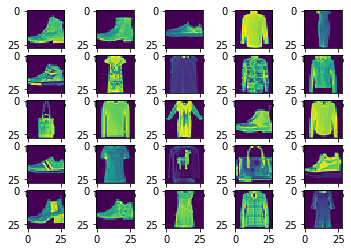

In [10]:
i = 0
for image, label in train_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.imshow(image)
    i = i+1

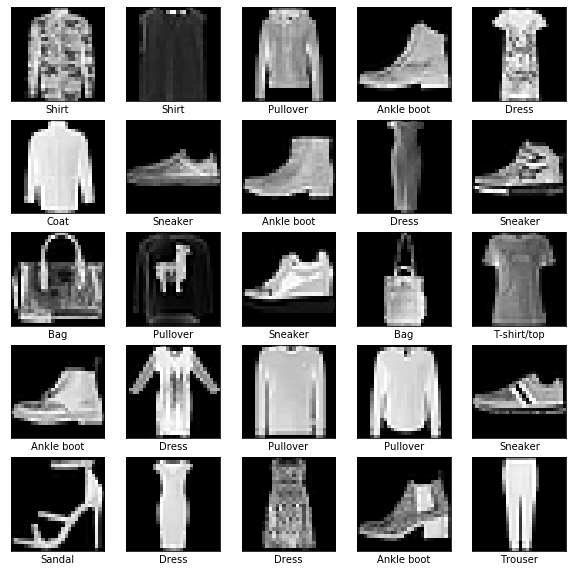

In [11]:
plt.figure(figsize=(10,10))
i = 0
for image, label in train_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
    i = i+1

plt.show()

### Normalize the Data

In [12]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

#The map function applies the normalize function to each element in the train and test datasets

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [30]:
train_dataset.repeat()

<DatasetV1Adapter shapes: ((?, 28, 28, 1), (?,)), types: (tf.float32, tf.int64)>

In [14]:
class_names[label]

'Ankle boot'

## Build Neural Network

In [15]:
#create a model of sequential layers
#don't forget [ ] brackets

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(units = 128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(units = 10, activation=tf.nn.softmax)
                            ])

In [16]:
#compile the model before fit, with defining appropriate loss and optimizer function

model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [17]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


 464/1875 [======>.......................] - ETA: 4:17:05 - loss: 2.5693 - acc: 0.12 - ETA: 1:04:36 - loss: 2.2675 - acc: 0.23 - ETA: 37:05 - loss: 2.1004 - acc: 0.3259 - ETA: 23:42 - loss: 1.8993 - acc: 0.39 - ETA: 17:27 - loss: 1.7797 - acc: 0.42 - ETA: 14:37 - loss: 1.6631 - acc: 0.46 - ETA: 12:00 - loss: 1.5768 - acc: 0.48 - ETA: 10:12 - loss: 1.4726 - acc: 0.52 - ETA: 9:11 - loss: 1.4279 - acc: 0.5269 - ETA: 8:22 - loss: 1.3778 - acc: 0.537 - ETA: 7:27 - loss: 1.3183 - acc: 0.555 - ETA: 6:44 - loss: 1.2620 - acc: 0.576 - ETA: 6:09 - loss: 1.2319 - acc: 0.587 - ETA: 5:39 - loss: 1.1939 - acc: 0.599 - ETA: 5:27 - loss: 1.1820 - acc: 0.601 - ETA: 5:04 - loss: 1.1498 - acc: 0.611 - ETA: 4:44 - loss: 1.1195 - acc: 0.618 - ETA: 4:36 - loss: 1.1065 - acc: 0.619 - ETA: 4:29 - loss: 1.0973 - acc: 0.621 - ETA: 4:13 - loss: 1.0687 - acc: 0.631 - ETA: 4:04 - loss: 1.0530 - acc: 0.635 - ETA: 3:51 - loss: 1.0370 - acc: 0.642 - ETA: 3:37 - loss: 1.0181 - acc: 0.651 - ETA: 3:30 - loss: 1.0010 - a

1540/1875 [=======================>......] - ETA: 29s - loss: 0.5654 - acc: 0.80 - ETA: 29s - loss: 0.5653 - acc: 0.80 - ETA: 29s - loss: 0.5652 - acc: 0.80 - ETA: 29s - loss: 0.5647 - acc: 0.80 - ETA: 29s - loss: 0.5644 - acc: 0.80 - ETA: 29s - loss: 0.5641 - acc: 0.80 - ETA: 29s - loss: 0.5641 - acc: 0.80 - ETA: 28s - loss: 0.5632 - acc: 0.80 - ETA: 28s - loss: 0.5632 - acc: 0.80 - ETA: 28s - loss: 0.5624 - acc: 0.80 - ETA: 28s - loss: 0.5620 - acc: 0.80 - ETA: 28s - loss: 0.5613 - acc: 0.80 - ETA: 27s - loss: 0.5610 - acc: 0.80 - ETA: 27s - loss: 0.5607 - acc: 0.80 - ETA: 27s - loss: 0.5608 - acc: 0.80 - ETA: 27s - loss: 0.5603 - acc: 0.80 - ETA: 27s - loss: 0.5602 - acc: 0.80 - ETA: 27s - loss: 0.5596 - acc: 0.80 - ETA: 26s - loss: 0.5592 - acc: 0.80 - ETA: 26s - loss: 0.5584 - acc: 0.80 - ETA: 26s - loss: 0.5579 - acc: 0.80 - ETA: 26s - loss: 0.5579 - acc: 0.80 - ETA: 26s - loss: 0.5579 - acc: 0.80 - ETA: 26s - loss: 0.5579 - acc: 0.80 - ETA: 26s - loss: 0.5577 - acc: 0.80 - ETA: 

1875/1875 [==============================] - ETA: 9s - loss: 0.5120 - acc: 0.820 - ETA: 9s - loss: 0.5117 - acc: 0.820 - ETA: 9s - loss: 0.5115 - acc: 0.820 - ETA: 9s - loss: 0.5109 - acc: 0.820 - ETA: 9s - loss: 0.5106 - acc: 0.820 - ETA: 9s - loss: 0.5100 - acc: 0.820 - ETA: 8s - loss: 0.5099 - acc: 0.820 - ETA: 8s - loss: 0.5097 - acc: 0.820 - ETA: 8s - loss: 0.5094 - acc: 0.821 - ETA: 8s - loss: 0.5092 - acc: 0.821 - ETA: 8s - loss: 0.5090 - acc: 0.821 - ETA: 8s - loss: 0.5090 - acc: 0.821 - ETA: 8s - loss: 0.5089 - acc: 0.821 - ETA: 8s - loss: 0.5090 - acc: 0.821 - ETA: 8s - loss: 0.5090 - acc: 0.821 - ETA: 8s - loss: 0.5089 - acc: 0.821 - ETA: 7s - loss: 0.5085 - acc: 0.821 - ETA: 7s - loss: 0.5082 - acc: 0.821 - ETA: 7s - loss: 0.5079 - acc: 0.821 - ETA: 7s - loss: 0.5075 - acc: 0.821 - ETA: 7s - loss: 0.5073 - acc: 0.821 - ETA: 7s - loss: 0.5069 - acc: 0.822 - ETA: 7s - loss: 0.5067 - acc: 0.822 - ETA: 7s - loss: 0.5063 - acc: 0.822 - ETA: 6s - loss: 0.5062 - acc: 0.822 - ETA: 

 700/1875 [==========>...................] - ETA: 4:13 - loss: 0.2866 - acc: 0.906 - ETA: 1:30 - loss: 0.4135 - acc: 0.843 - ETA: 58s - loss: 0.4205 - acc: 0.835 - ETA: 52s - loss: 0.4443 - acc: 0.83 - ETA: 47s - loss: 0.4339 - acc: 0.84 - ETA: 47s - loss: 0.4580 - acc: 0.82 - ETA: 48s - loss: 0.4390 - acc: 0.83 - ETA: 48s - loss: 0.4403 - acc: 0.83 - ETA: 44s - loss: 0.4198 - acc: 0.84 - ETA: 40s - loss: 0.4072 - acc: 0.85 - ETA: 40s - loss: 0.4068 - acc: 0.85 - ETA: 39s - loss: 0.4113 - acc: 0.85 - ETA: 38s - loss: 0.4085 - acc: 0.85 - ETA: 37s - loss: 0.4079 - acc: 0.85 - ETA: 36s - loss: 0.3951 - acc: 0.85 - ETA: 36s - loss: 0.3965 - acc: 0.85 - ETA: 36s - loss: 0.3928 - acc: 0.86 - ETA: 35s - loss: 0.3999 - acc: 0.85 - ETA: 34s - loss: 0.4109 - acc: 0.85 - ETA: 34s - loss: 0.4050 - acc: 0.85 - ETA: 33s - loss: 0.4077 - acc: 0.85 - ETA: 33s - loss: 0.4098 - acc: 0.85 - ETA: 33s - loss: 0.4041 - acc: 0.85 - ETA: 33s - loss: 0.4059 - acc: 0.85 - ETA: 32s - loss: 0.4055 - acc: 0.85 - 

1867/1875 [============================>.] - ETA: 10s - loss: 0.3779 - acc: 0.86 - ETA: 10s - loss: 0.3782 - acc: 0.86 - ETA: 10s - loss: 0.3779 - acc: 0.86 - ETA: 10s - loss: 0.3780 - acc: 0.86 - ETA: 10s - loss: 0.3780 - acc: 0.86 - ETA: 10s - loss: 0.3785 - acc: 0.86 - ETA: 10s - loss: 0.3785 - acc: 0.86 - ETA: 10s - loss: 0.3783 - acc: 0.86 - ETA: 10s - loss: 0.3784 - acc: 0.86 - ETA: 10s - loss: 0.3782 - acc: 0.86 - ETA: 10s - loss: 0.3780 - acc: 0.86 - ETA: 10s - loss: 0.3779 - acc: 0.86 - ETA: 9s - loss: 0.3779 - acc: 0.8637 - ETA: 9s - loss: 0.3778 - acc: 0.863 - ETA: 9s - loss: 0.3776 - acc: 0.863 - ETA: 9s - loss: 0.3774 - acc: 0.863 - ETA: 9s - loss: 0.3774 - acc: 0.863 - ETA: 9s - loss: 0.3772 - acc: 0.864 - ETA: 9s - loss: 0.3771 - acc: 0.863 - ETA: 9s - loss: 0.3769 - acc: 0.864 - ETA: 9s - loss: 0.3769 - acc: 0.864 - ETA: 9s - loss: 0.3768 - acc: 0.864 - ETA: 9s - loss: 0.3769 - acc: 0.864 - ETA: 9s - loss: 0.3768 - acc: 0.864 - ETA: 9s - loss: 0.3769 - acc: 0.863 - ETA:

1875/1875 [==============================] - ETA: 0s - loss: 0.3716 - acc: 0.865 - ETA: 0s - loss: 0.3717 - acc: 0.865 - ETA: 0s - loss: 0.3718 - acc: 0.865 - 37s 20ms/step - loss: 0.3718 - acc: 0.8657
Epoch 3/5


 611/1875 [========>.....................] - ETA: 3:16 - loss: 0.3038 - acc: 0.812 - ETA: 59s - loss: 0.2685 - acc: 0.868 - ETA: 45s - loss: 0.3274 - acc: 0.85 - ETA: 39s - loss: 0.3080 - acc: 0.87 - ETA: 38s - loss: 0.3228 - acc: 0.87 - ETA: 35s - loss: 0.3324 - acc: 0.87 - ETA: 35s - loss: 0.3326 - acc: 0.87 - ETA: 33s - loss: 0.3319 - acc: 0.87 - ETA: 32s - loss: 0.3290 - acc: 0.87 - ETA: 32s - loss: 0.3241 - acc: 0.87 - ETA: 31s - loss: 0.3184 - acc: 0.88 - ETA: 31s - loss: 0.3296 - acc: 0.88 - ETA: 31s - loss: 0.3229 - acc: 0.88 - ETA: 30s - loss: 0.3202 - acc: 0.88 - ETA: 30s - loss: 0.3132 - acc: 0.88 - ETA: 30s - loss: 0.3198 - acc: 0.88 - ETA: 31s - loss: 0.3213 - acc: 0.88 - ETA: 31s - loss: 0.3175 - acc: 0.88 - ETA: 31s - loss: 0.3202 - acc: 0.88 - ETA: 30s - loss: 0.3252 - acc: 0.87 - ETA: 30s - loss: 0.3227 - acc: 0.87 - ETA: 30s - loss: 0.3252 - acc: 0.87 - ETA: 29s - loss: 0.3254 - acc: 0.87 - ETA: 29s - loss: 0.3269 - acc: 0.87 - ETA: 29s - loss: 0.3264 - acc: 0.87 - ET

1875/1875 [==============================] - ETA: 9s - loss: 0.3378 - acc: 0.875 - ETA: 9s - loss: 0.3375 - acc: 0.875 - ETA: 9s - loss: 0.3374 - acc: 0.875 - ETA: 9s - loss: 0.3373 - acc: 0.875 - ETA: 9s - loss: 0.3370 - acc: 0.875 - ETA: 9s - loss: 0.3369 - acc: 0.875 - ETA: 9s - loss: 0.3370 - acc: 0.875 - ETA: 9s - loss: 0.3370 - acc: 0.875 - ETA: 9s - loss: 0.3370 - acc: 0.875 - ETA: 9s - loss: 0.3368 - acc: 0.875 - ETA: 9s - loss: 0.3369 - acc: 0.875 - ETA: 9s - loss: 0.3369 - acc: 0.875 - ETA: 8s - loss: 0.3372 - acc: 0.875 - ETA: 8s - loss: 0.3374 - acc: 0.875 - ETA: 8s - loss: 0.3374 - acc: 0.875 - ETA: 8s - loss: 0.3377 - acc: 0.875 - ETA: 8s - loss: 0.3380 - acc: 0.874 - ETA: 8s - loss: 0.3382 - acc: 0.874 - ETA: 8s - loss: 0.3380 - acc: 0.875 - ETA: 8s - loss: 0.3381 - acc: 0.875 - ETA: 8s - loss: 0.3385 - acc: 0.874 - ETA: 8s - loss: 0.3385 - acc: 0.874 - ETA: 8s - loss: 0.3384 - acc: 0.874 - ETA: 8s - loss: 0.3380 - acc: 0.875 - ETA: 8s - loss: 0.3379 - acc: 0.875 - ETA: 

 546/1875 [=======>......................] - ETA: 3:14 - loss: 0.2409 - acc: 0.906 - ETA: 1:38 - loss: 0.3964 - acc: 0.843 - ETA: 1:24 - loss: 0.4221 - acc: 0.831 - ETA: 1:06 - loss: 0.3229 - acc: 0.871 - ETA: 1:03 - loss: 0.3151 - acc: 0.878 - ETA: 57s - loss: 0.2828 - acc: 0.891 - ETA: 49s - loss: 0.2753 - acc: 0.89 - ETA: 47s - loss: 0.2727 - acc: 0.89 - ETA: 43s - loss: 0.2838 - acc: 0.88 - ETA: 40s - loss: 0.2882 - acc: 0.88 - ETA: 38s - loss: 0.2977 - acc: 0.88 - ETA: 36s - loss: 0.2864 - acc: 0.88 - ETA: 35s - loss: 0.2940 - acc: 0.88 - ETA: 36s - loss: 0.2976 - acc: 0.88 - ETA: 39s - loss: 0.2973 - acc: 0.88 - ETA: 39s - loss: 0.3014 - acc: 0.88 - ETA: 38s - loss: 0.3043 - acc: 0.88 - ETA: 38s - loss: 0.3121 - acc: 0.88 - ETA: 37s - loss: 0.3086 - acc: 0.88 - ETA: 36s - loss: 0.3064 - acc: 0.88 - ETA: 36s - loss: 0.3037 - acc: 0.88 - ETA: 37s - loss: 0.3018 - acc: 0.88 - ETA: 36s - loss: 0.3004 - acc: 0.88 - ETA: 36s - loss: 0.2977 - acc: 0.88 - ETA: 36s - loss: 0.2976 - acc: 0

1781/1875 [===========================>..] - ETA: 15s - loss: 0.3097 - acc: 0.88 - ETA: 15s - loss: 0.3100 - acc: 0.88 - ETA: 15s - loss: 0.3096 - acc: 0.88 - ETA: 15s - loss: 0.3097 - acc: 0.88 - ETA: 15s - loss: 0.3097 - acc: 0.88 - ETA: 15s - loss: 0.3097 - acc: 0.88 - ETA: 15s - loss: 0.3096 - acc: 0.88 - ETA: 14s - loss: 0.3097 - acc: 0.88 - ETA: 14s - loss: 0.3097 - acc: 0.88 - ETA: 14s - loss: 0.3102 - acc: 0.88 - ETA: 14s - loss: 0.3100 - acc: 0.88 - ETA: 14s - loss: 0.3103 - acc: 0.88 - ETA: 14s - loss: 0.3101 - acc: 0.88 - ETA: 14s - loss: 0.3097 - acc: 0.88 - ETA: 14s - loss: 0.3096 - acc: 0.88 - ETA: 14s - loss: 0.3095 - acc: 0.88 - ETA: 14s - loss: 0.3096 - acc: 0.88 - ETA: 14s - loss: 0.3096 - acc: 0.88 - ETA: 14s - loss: 0.3097 - acc: 0.88 - ETA: 13s - loss: 0.3094 - acc: 0.88 - ETA: 13s - loss: 0.3096 - acc: 0.88 - ETA: 13s - loss: 0.3096 - acc: 0.88 - ETA: 13s - loss: 0.3095 - acc: 0.88 - ETA: 13s - loss: 0.3094 - acc: 0.88 - ETA: 13s - loss: 0.3095 - acc: 0.88 - ETA: 

1875/1875 [==============================] - ETA: 1s - loss: 0.3064 - acc: 0.888 - ETA: 1s - loss: 0.3065 - acc: 0.888 - ETA: 1s - loss: 0.3064 - acc: 0.888 - ETA: 1s - loss: 0.3063 - acc: 0.888 - ETA: 1s - loss: 0.3062 - acc: 0.888 - ETA: 1s - loss: 0.3062 - acc: 0.889 - ETA: 1s - loss: 0.3061 - acc: 0.889 - ETA: 1s - loss: 0.3061 - acc: 0.889 - ETA: 1s - loss: 0.3061 - acc: 0.889 - ETA: 1s - loss: 0.3060 - acc: 0.889 - ETA: 1s - loss: 0.3060 - acc: 0.889 - ETA: 1s - loss: 0.3059 - acc: 0.889 - ETA: 1s - loss: 0.3059 - acc: 0.889 - ETA: 1s - loss: 0.3060 - acc: 0.889 - ETA: 1s - loss: 0.3059 - acc: 0.889 - ETA: 1s - loss: 0.3058 - acc: 0.889 - ETA: 1s - loss: 0.3057 - acc: 0.889 - ETA: 0s - loss: 0.3055 - acc: 0.889 - ETA: 0s - loss: 0.3054 - acc: 0.889 - ETA: 0s - loss: 0.3052 - acc: 0.889 - ETA: 0s - loss: 0.3052 - acc: 0.889 - ETA: 0s - loss: 0.3052 - acc: 0.889 - ETA: 0s - loss: 0.3050 - acc: 0.889 - ETA: 0s - loss: 0.3050 - acc: 0.889 - ETA: 0s - loss: 0.3051 - acc: 0.889 - ETA: 

 460/1875 [======>.......................] - ETA: 3:14 - loss: 0.2369 - acc: 0.937 - ETA: 1:00 - loss: 0.3716 - acc: 0.881 - ETA: 52s - loss: 0.3275 - acc: 0.882 - ETA: 53s - loss: 0.3509 - acc: 0.87 - ETA: 58s - loss: 0.3420 - acc: 0.87 - ETA: 53s - loss: 0.3263 - acc: 0.88 - ETA: 49s - loss: 0.3087 - acc: 0.88 - ETA: 50s - loss: 0.3078 - acc: 0.88 - ETA: 51s - loss: 0.3109 - acc: 0.88 - ETA: 47s - loss: 0.3173 - acc: 0.87 - ETA: 44s - loss: 0.3218 - acc: 0.88 - ETA: 42s - loss: 0.3231 - acc: 0.87 - ETA: 41s - loss: 0.3281 - acc: 0.87 - ETA: 41s - loss: 0.3285 - acc: 0.87 - ETA: 43s - loss: 0.3271 - acc: 0.87 - ETA: 44s - loss: 0.3262 - acc: 0.87 - ETA: 43s - loss: 0.3166 - acc: 0.87 - ETA: 42s - loss: 0.3149 - acc: 0.87 - ETA: 47s - loss: 0.3170 - acc: 0.87 - ETA: 46s - loss: 0.3157 - acc: 0.87 - ETA: 44s - loss: 0.3201 - acc: 0.87 - ETA: 45s - loss: 0.3192 - acc: 0.87 - ETA: 48s - loss: 0.3193 - acc: 0.87 - ETA: 51s - loss: 0.3166 - acc: 0.87 - ETA: 52s - loss: 0.3148 - acc: 0.87 - 

1287/1875 [===================>..........] - ETA: 46s - loss: 0.2925 - acc: 0.89 - ETA: 46s - loss: 0.2926 - acc: 0.89 - ETA: 45s - loss: 0.2926 - acc: 0.89 - ETA: 45s - loss: 0.2927 - acc: 0.89 - ETA: 45s - loss: 0.2928 - acc: 0.89 - ETA: 45s - loss: 0.2927 - acc: 0.89 - ETA: 45s - loss: 0.2926 - acc: 0.89 - ETA: 45s - loss: 0.2923 - acc: 0.89 - ETA: 45s - loss: 0.2924 - acc: 0.89 - ETA: 45s - loss: 0.2925 - acc: 0.89 - ETA: 45s - loss: 0.2922 - acc: 0.89 - ETA: 44s - loss: 0.2922 - acc: 0.89 - ETA: 44s - loss: 0.2924 - acc: 0.89 - ETA: 44s - loss: 0.2924 - acc: 0.89 - ETA: 44s - loss: 0.2925 - acc: 0.89 - ETA: 44s - loss: 0.2926 - acc: 0.89 - ETA: 44s - loss: 0.2925 - acc: 0.89 - ETA: 44s - loss: 0.2926 - acc: 0.89 - ETA: 44s - loss: 0.2924 - acc: 0.89 - ETA: 44s - loss: 0.2923 - acc: 0.89 - ETA: 44s - loss: 0.2925 - acc: 0.89 - ETA: 44s - loss: 0.2926 - acc: 0.89 - ETA: 44s - loss: 0.2927 - acc: 0.89 - ETA: 44s - loss: 0.2929 - acc: 0.89 - ETA: 44s - loss: 0.2928 - acc: 0.89 - ETA: 

1696/1875 [==========================>...] - ETA: 25s - loss: 0.2937 - acc: 0.89 - ETA: 25s - loss: 0.2936 - acc: 0.89 - ETA: 25s - loss: 0.2940 - acc: 0.89 - ETA: 25s - loss: 0.2940 - acc: 0.89 - ETA: 25s - loss: 0.2939 - acc: 0.89 - ETA: 25s - loss: 0.2938 - acc: 0.89 - ETA: 24s - loss: 0.2938 - acc: 0.89 - ETA: 24s - loss: 0.2938 - acc: 0.89 - ETA: 24s - loss: 0.2938 - acc: 0.89 - ETA: 24s - loss: 0.2937 - acc: 0.89 - ETA: 24s - loss: 0.2936 - acc: 0.89 - ETA: 24s - loss: 0.2937 - acc: 0.89 - ETA: 24s - loss: 0.2937 - acc: 0.89 - ETA: 24s - loss: 0.2937 - acc: 0.89 - ETA: 24s - loss: 0.2936 - acc: 0.89 - ETA: 24s - loss: 0.2936 - acc: 0.89 - ETA: 24s - loss: 0.2938 - acc: 0.89 - ETA: 24s - loss: 0.2935 - acc: 0.89 - ETA: 24s - loss: 0.2936 - acc: 0.89 - ETA: 23s - loss: 0.2933 - acc: 0.89 - ETA: 23s - loss: 0.2935 - acc: 0.89 - ETA: 23s - loss: 0.2936 - acc: 0.89 - ETA: 23s - loss: 0.2936 - acc: 0.89 - ETA: 23s - loss: 0.2934 - acc: 0.89 - ETA: 23s - loss: 0.2934 - acc: 0.89 - ETA: 

1875/1875 [==============================] - ETA: 7s - loss: 0.2921 - acc: 0.892 - ETA: 7s - loss: 0.2921 - acc: 0.892 - ETA: 7s - loss: 0.2921 - acc: 0.892 - ETA: 7s - loss: 0.2922 - acc: 0.892 - ETA: 7s - loss: 0.2919 - acc: 0.892 - ETA: 7s - loss: 0.2919 - acc: 0.892 - ETA: 7s - loss: 0.2921 - acc: 0.892 - ETA: 7s - loss: 0.2920 - acc: 0.892 - ETA: 7s - loss: 0.2922 - acc: 0.892 - ETA: 7s - loss: 0.2921 - acc: 0.892 - ETA: 7s - loss: 0.2920 - acc: 0.892 - ETA: 6s - loss: 0.2919 - acc: 0.892 - ETA: 6s - loss: 0.2918 - acc: 0.892 - ETA: 6s - loss: 0.2919 - acc: 0.892 - ETA: 6s - loss: 0.2919 - acc: 0.892 - ETA: 6s - loss: 0.2921 - acc: 0.892 - ETA: 6s - loss: 0.2919 - acc: 0.892 - ETA: 6s - loss: 0.2919 - acc: 0.892 - ETA: 6s - loss: 0.2917 - acc: 0.892 - ETA: 6s - loss: 0.2918 - acc: 0.892 - ETA: 6s - loss: 0.2916 - acc: 0.892 - ETA: 5s - loss: 0.2914 - acc: 0.893 - ETA: 5s - loss: 0.2913 - acc: 0.893 - ETA: 5s - loss: 0.2915 - acc: 0.893 - ETA: 5s - loss: 0.2915 - acc: 0.893 - ETA: 

In [18]:
#evaluate the accuracy of test data

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - ETA: 1:17 - loss: 0.3366 - acc: 0.875 - ETA: 19s - loss: 0.2730 - acc: 0.906 - ETA: 11s - loss: 0.3399 - acc: 0.86 - ETA: 8s - loss: 0.3157 - acc: 0.8750 - ETA: 7s - loss: 0.3120 - acc: 0.873 - ETA: 7s - loss: 0.3346 - acc: 0.868 - ETA: 7s - loss: 0.3601 - acc: 0.860 - ETA: 7s - loss: 0.3568 - acc: 0.863 - ETA: 6s - loss: 0.3577 - acc: 0.863 - ETA: 6s - loss: 0.3684 - acc: 0.857 - ETA: 6s - loss: 0.3554 - acc: 0.864 - ETA: 5s - loss: 0.3561 - acc: 0.867 - ETA: 5s - loss: 0.3650 - acc: 0.866 - ETA: 5s - loss: 0.3734 - acc: 0.862 - ETA: 4s - loss: 0.3688 - acc: 0.866 - ETA: 4s - loss: 0.3633 - acc: 0.870 - ETA: 4s - loss: 0.3642 - acc: 0.868 - ETA: 4s - loss: 0.3598 - acc: 0.869 - ETA: 4s - loss: 0.3610 - acc: 0.870 - ETA: 4s - loss: 0.3631 - acc: 0.869 - ETA: 4s - loss: 0.3625 - acc: 0.869 - ETA: 4s - loss: 0.3638 - acc: 0.868 - ETA: 4s - loss: 0.3633 - acc: 0.868 - ETA: 4s - loss: 0.3562 - acc: 0.870 - ETA: 4s - loss: 0.3553 - acc: 0.871 - ETA

In [19]:
test_accuracy

0.8717

In [20]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    
    predictions = model.predict(test_images)

In [21]:
predictions.shape

(32, 10)

In [22]:
predictions[0]

array([5.4350876e-05, 1.6761104e-06, 1.8953341e-03, 1.7768375e-04,
       7.4438483e-02, 3.4096846e-08, 9.2342848e-01, 4.0769174e-10,
       3.9448273e-06, 5.1436678e-11], dtype=float32)

In [23]:
np.argmax(predictions[0])

6

In [24]:
test_labels[0]

6

In [25]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

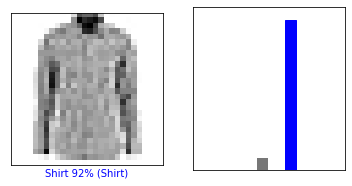

In [26]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

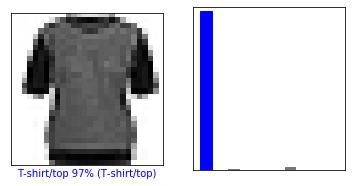

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

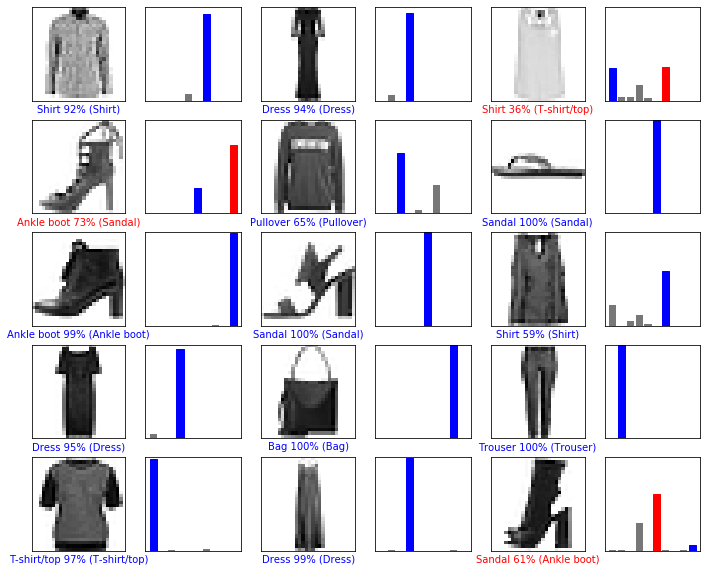

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)